In [1]:
import os
import sys
import numpy as np
import torch
import cv2

In [2]:
from torch.utils.data.dataset import Dataset

In [3]:
sys.path.insert(0,'..')
from config import global_config

In [4]:
training_file = '/home/ubuntu/dev/LaneNet-Pytorch/data/training_data/train.txt'
CFG = global_config.cfg

In [5]:
class LaneNetDataset(Dataset):
    def __init__(self, text_file, cfg):
        # Set image size
        self.height, self.width = cfg.TRAIN.IMG_HEIGHT, cfg.TRAIN.IMG_WIDTH
        
        # Create a list with all image path
        # [[img, binary, instance], ...]
        self.data_locations = []
        with open(text_file, 'r') as f:
            for line in f:
                d = [a for a in line.rstrip('\n').split(' ')]
                self.data_locations.append(d)

    def __getitem__(self, index):
        '''Return 3 images (src, binary, instance)'''
        source_path, binary_path, instance_path = self.data_locations[index]
        source_img = cv2.imread(source_path)[:,:,::-1]  # convert to RGB as well
        binary_img = cv2.imread(binary_path, 0)
        instance_img = cv2.imread(instance_path, 0)
        
        # resize images
        source_img = self._resize(source_img, interp=cv2.INTER_LINEAR)
        binary_img = self._resize(binary_img)
        instance_img = self._resize(instance_img)
        
        return (source_img, binary_img, instance_img)

    def __len__(self):
        return len(self.data_locations)
    
    def _resize(self, img, interp=cv2.INTER_NEAREST):
        '''
        Resize image based on config width and height
        Binary and instance images should not be interpolated with 
        linear algorithms since pixel values are valuable
        '''
        return cv2.resize(img, dsize=(self.width, self.height), interpolation=interp)

In [6]:
dataset = LaneNetDataset(training_file, CFG)
print(len(dataset))

3626


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = dataset[0]  # first data

(256, 512, 3)


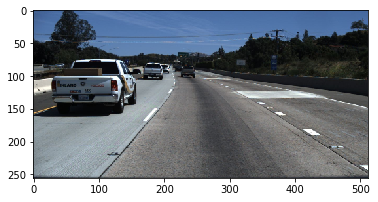

In [9]:
plt.imshow(data[0])
print(data[0].shape)

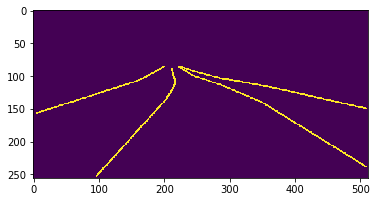

In [10]:
# Binary segmentation
plt.imshow(data[1])

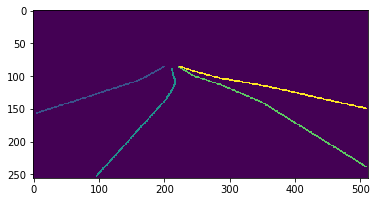

In [11]:
# Instance segmentation
plt.imshow(data[2])